# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [ ]:
!pip install wquantiles

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean #Return mean of array after trimming distribution from both tails
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# Estimates of Location
## Example: Location Estimates of Population and Murder Rates

In [ ]:
# Table 1-2
state = pd.read_csv('../input/practical-statistics/state.csv')
state.head(8)

Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [ ]:
len(state)

In [ ]:
print(state['Population'].mean())

In [ ]:
print(trim_mean(state['Population'], 0.1))

In [ ]:
print(state['Population'].median())

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]

# 10 * 0.1 = 1 -> it will remove the first and the last element and compute the average 44/8
print("10%: ",trim_mean(x, 0.1))


# another example with an array
new_x = [[1, 2, 3, 4],
        [25, 26, 27, 28],
        [90, 100, 110, 120]]

# 0.25 * 3 = 0.75 -> it will not remove any element(here is row)
print("\n25%: ",trim_mean(new_x, 0.25))

# 0.34 * 3 = 1.02 -> it will remove the first and last two rows
print("\n40%: ",trim_mean(new_x, 0.34))

Weighted mean is available with numpy. For weighted median, we can use the specialised package `wquantiles` (https://pypi.org/project/wquantiles/).

In [ ]:
print(state['Murder.Rate'].mean())

In [ ]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
# weighted_mean = sum(Murder.Rate_element * Population_element) / sum(Population)

In [ ]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

In [ ]:
### EXTRA ###
# example of weighted mean from documentation

# avg = sum(a * weights) / sum(weights)
#((1*4) + (2*3) + (3*2) + (4*1))/ (4 + 3 + 2 + 1)
print(np.average(np.array([1,2,3,4]), weights=np.array([4,3,2,1])))

# example of the weighted median 
wquantiles.median(np.array([1,2,3,4,5]), weights = np.array([0.15, 0.1, 0.2, 0.3, 0.45]))

# Estimates of Variability

In [ ]:
# Table 1-2
state.head(8)

Standard deviation

In [ ]:
print(state['Population'].std())

Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [ ]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [ ]:
# first method
print(robust.scale.mad(state['Population']))

# second method
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

## Percentiles and Boxplots
_Pandas_ has the `quantile` method for data frames.

In [ ]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

In [ ]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

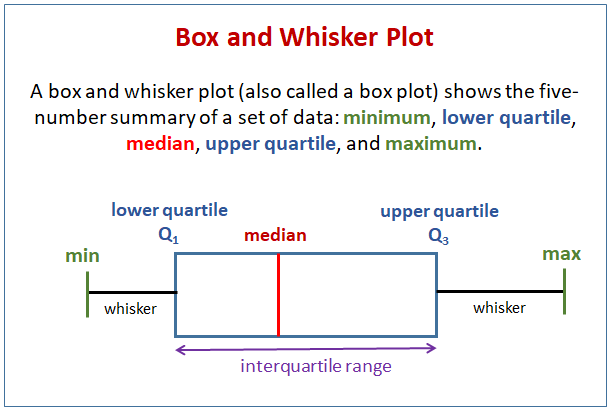

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(5, 6))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

## Frequency Table and Histograms
The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [ ]:
### EXTRA ###
pd.cut(np.array([1,2,3,4,5,6,7,8,9,10]), 2)

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

In [ ]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation) # Abbreviation is the name of the column!
    })
pd.DataFrame(groups)

In [ ]:
### EXTRA ###
coco = df.groupby(by='binnedPopulation')
coco.head()
# the least populous state is Wyoming
# the most populous state is California

# to understand the logic of loop above
# s is the intervals
# sa is the row corresponding to each interval
#for s, sa in coco:
#    print(sa) # or sa

_Pandas_ also supports histograms for exploratory data analysis.

In [ ]:
# bin size is too large (i.e., number of bins too small), e.g., 3 -> important features can be obscured
# bin size is too small (i.e., number of bins too large) e.g., 50 -> bigger picture is lost
ax = (state['Population'] / 1_000_000).plot.hist(bins= 10, figsize=(4, 4)) 
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()


## Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], # the difference is the scale of the y-axis
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# Exploring Binary and Categorical Data

In [ ]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

_Pandas_ also supports bar charts for displaying a single categorical variable.

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation
First read the required datasets

In [ ]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [ ]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

Next we focus on funds traded on major exchanges (sector == 'etf'). 

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

## Scatterplots
Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

# Exploring Two or More Variables
Load the kc_tax dataset and filter based on a variety of criteria

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

## Hexagonal binning and Contours 
### Plotting numeric versus numeric data

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. 

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Two Categorical Variables
Load the `lc_loans` dataset

In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [ ]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

In [ ]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

## Categorical and Numeric Data
_Pandas_ boxplots of a column can be grouped by a different column.

In [ ]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ also supports a variation of boxplots called _violinplot_. 

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()